In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline 
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r"C:\Users\User\Documents\DATA SCIENCE PROJECT\teen_phone_addiction_dataset.csv") 


In [ ]:
data.head(5)

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
data.columns

In [ ]:
data["Gender"].value_counts()

In [ ]:
data.duplicated().sum()

In [ ]:
data.isna().sum()

In [ ]:
data.describe().T

In [ ]:
data.describe(include = "object")

In [ ]:
data["Name"].duplicated().sum()

In [ ]:
# since Names have 67 duplicates, lets check the duplicates in the names
duplicates = data[data["Name"].duplicated(keep=False)]
print(duplicates)


In [ ]:
# List of duplicated names
duplicated_names = data[data["Name"].duplicated(keep=False)]["Name"].unique()

# Display the result
print(duplicated_names)



In [ ]:
# Count how many times each name appears
name_counts = data["Name"].value_counts()

# Filter only names that appear more than once
duplicate_name_counts = name_counts[name_counts > 1]

print(duplicate_name_counts)


In [ ]:
# Filter rows where Name is "John Smith"
Michael_Brown_duplicates = data[data["Name"] == "Michael Brown"]

# Display the results
print(Michael_Brown_duplicates)


In [ ]:


# Step 1: Get duplicated names
duplicated_names = data["Name"][data["Name"].duplicated(keep=False)].unique()

# Step 2: Filter rows with duplicated names
duplicates_df = data[data["Name"].isin(duplicated_names)]

# Step 3: Prepare empty list to collect aggregated rows
aggregated_rows = []

# Step 4: Loop through each duplicated name
for name in duplicated_names:
    group = duplicates_df[duplicates_df["Name"] == name]
    aggregated_row = {"Name": name}
    
    for col in data.columns:
        if col == "Name":
            continue
        if pd.api.types.is_numeric_dtype(data[col]):
            # Average for numeric columns
            aggregated_row[col] = group[col].mean()
        else:
            # Pick the first (or random) for non-numeric columns
            aggregated_row[col] = group[col].iloc[0]  # or np.random.choice(group[col].dropna())
    
    aggregated_rows.append(aggregated_row)

# Step 5: Convert list of dicts to DataFrame
aggregated_duplicates = pd.DataFrame(aggregated_rows)

# Display result
print(aggregated_duplicates)


In [ ]:
# Step 1: Identify duplicated names
duplicated_names = data["Name"][data["Name"].duplicated(keep=False)].unique()

# Step 2: Remove all rows with duplicated names from the original data
data_no_duplicates = data[~data["Name"].isin(duplicated_names)]

# Step 3: Append the aggregated duplicates
cleaned_data = pd.concat([data_no_duplicates, aggregated_duplicates], ignore_index=True)

# Optional: Sort by name or any column if needed
cleaned_data = cleaned_data.sort_values(by="Name").reset_index(drop=True)

# Final result
print(cleaned_data)


In [ ]:
cleaned_data

In [ ]:
cleaned_data.duplicated().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data = cleaned_data

In [ ]:
data

In [ ]:
data.drop(columns=["ID"], inplace=True)

In [ ]:
data.describe().T

In [ ]:
# Visualizing with histogram to understand the distribution
# Loop through numeric columns
for col in data.select_dtypes(include="number").columns:
    sns.histplot(data=data, x=col)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")  # <-- Y-axis shows frequency (count)
    plt.tight_layout()
    plt.show()

In [ ]:
# visualizing with boxplot to identify outliers
# Optional: use a consistent style
sns.set(style="whitegrid")

# Loop through each numeric column
numeric_cols = data.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(
        data=data,
        y=col,
        color='skyblue',
        fliersize=5,         # Size of outlier markers
        linewidth=2          # Thickness of box lines
    )
    
    plt.title(f'Boxplot of "{col}"', fontsize=14, weight='bold')
    plt.ylabel(col, fontsize=12)
    plt.xlabel("")  # No x-label since it's vertical
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
# identifying extreme users based on daily usage hours
# Step 1: Calculate IQR and upper bound for outliers
Q1 = data["Daily_Usage_Hours"].quantile(0.25)
Q3 = data["Daily_Usage_Hours"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Step 2: Create a new column to flag extreme users
data["Extreme_User"] = data["Daily_Usage_Hours"] > upper_bound


In [ ]:
# to see only extreme users
extreme_users = data[data["Extreme_User"] == True]
print(extreme_users)

# Note that extreme Users are those outliers i.e those with usage hours above the upper band using thr IQR method


In [ ]:
data["Extreme_User"].value_counts()


In [ ]:
sns.boxplot(data=data, y="Daily_Usage_Hours", x="Extreme_User", palette="Set2")
plt.figure(figsize=(10, 6))
plt.title("Box plot of daily usage hours by extreme user ststus")
plt.xlabel("Extreme User Status")
plt.ylabel("Daily Usuage Hours")
plt.show()




In [ ]:
data.head(5)

,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Extreme_User,Age_Group
0,Aaron Anderson,19.0,Female,Troyburgh,8th,7.1,8.7,100.0,1.0,0.7,...,14.0,2.9,1.6,1.1,Education,7.0,5.8,10.0,False,17-19
1,Aaron Blake,15.0,Other,East Scott,11th,3.7,7.2,66.0,3.0,0.0,...,12.0,4.4,2.9,2.0,Browsing,5.0,4.1,10.0,False,14-16
2,Aaron Campbell,15.0,Female,Port Sandra,12th,4.9,6.7,61.0,10.0,2.3,...,9.0,2.0,2.9,1.1,Other,9.0,2.6,9.7,False,14-16
3,Aaron Jackson,13.0,Other,New Meganchester,9th,6.9,7.6,53.0,8.0,2.1,...,13.0,1.5,2.6,0.8,Gaming,10.0,5.5,10.0,False,10-13
4,Aaron Leon,19.0,Female,Bethton,9th,6.3,7.9,76.0,3.0,2.0,...,20.0,2.8,2.6,0.0,Gaming,9.0,8.4,10.0,False,17-19


In [53]:
# we want to check the correlation between the age of the users and their daily usuage hours
correlation = data["Age"].corr(data["Daily_Usage_Hours"])
print(f"Correlation between Age and Daily Usage Hours: {correlation:.2f}")


Correlation between Age and Daily Usage Hours: 0.04


In [57]:
# Define age bins and labels
bins = [9, 13, 16, 19]  # Must start below the min age
labels = ['10-13', '14-16', '17-19']

# Create Age_Group column
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

# View result
print(data[["Age", "Age_Group"]].head())


    Age Age_Group
0  19.0     17-19
1  15.0     14-16
2  15.0     14-16
3  13.0     10-13
4  19.0     17-19


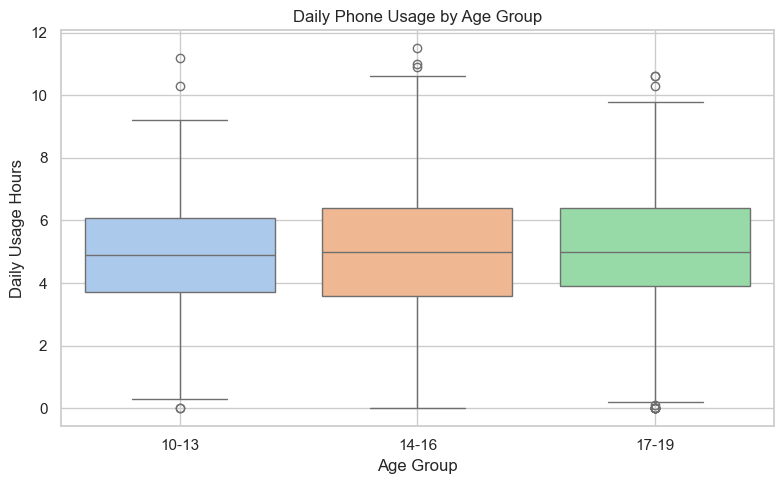

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Age_Group", y="Daily_Usage_Hours", data=data, palette="pastel")
plt.title("Daily Phone Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Daily Usage Hours")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Make sure age groups are defined
bins = [9, 13, 16, 19]
labels = ['10-13', '14-16', '17-19']
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Loop through each group and calculate correlation
for group in data["Age_Group"].unique():
    subset = data[data["Age_Group"] == group]
    
    # Skip group if not enough data
    if len(subset) < 2:
        print(f"Not enough data to calculate correlation for group: {group}")
        continue
    
    correlation = subset["Age"].corr(subset["Daily_Usage_Hours"])
    print(f"Correlation for Age Group {group}: {correlation:.2f}")



Correlation for Age Group 17-19: 0.03
Correlation for Age Group 14-16: 0.03
Correlation for Age Group 10-13: nan


There are no correlation between the Age and Daily Usuage hour


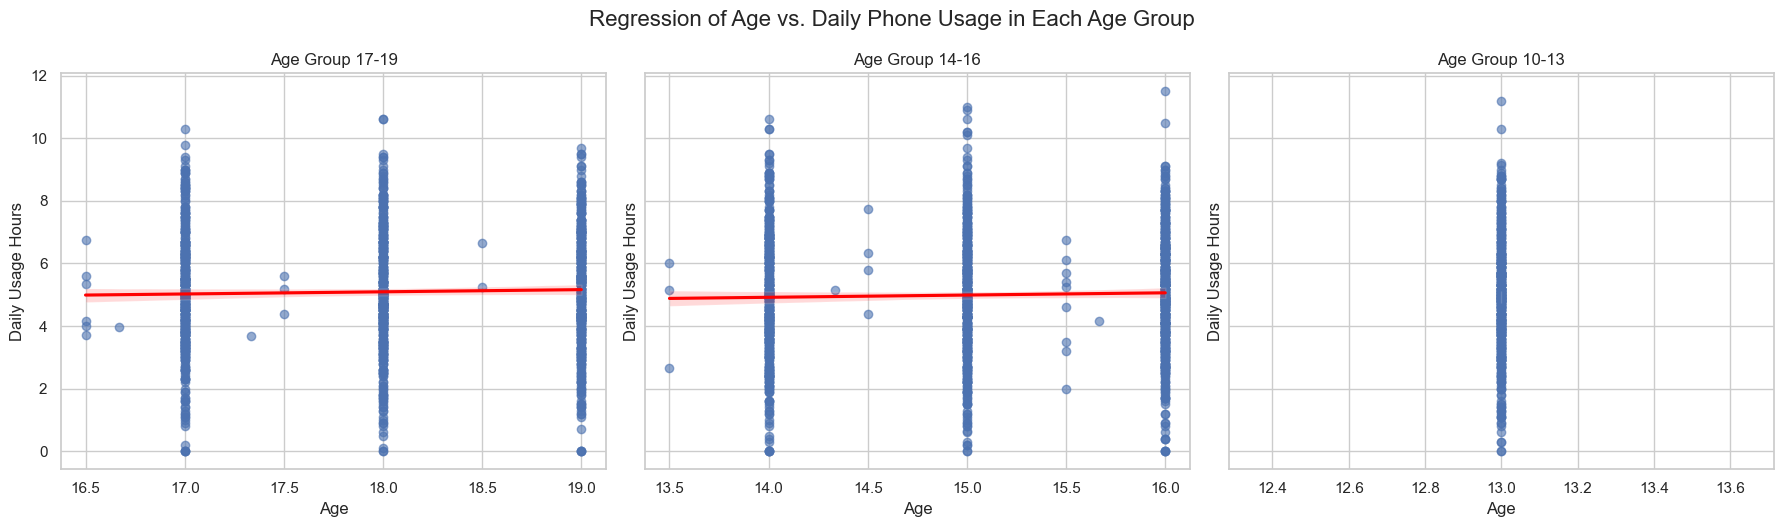

In [63]:

# Step 1: Define age groups (if not already done)
bins = [9, 13, 16, 19]
labels = ['10-13', '14-16', '17-19']
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Step 2: Create regression plots for each group
age_groups = data["Age_Group"].dropna().unique()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(age_groups), figsize=(18, 5), sharey=True)

# Step 3: Loop through each group and plot
for i, group in enumerate(age_groups):
    subset = data[data["Age_Group"] == group]
    
    sns.regplot(
        x="Age",
        y="Daily_Usage_Hours",
        data=subset,
        ax=axes[i],
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red"}
    )
    
    axes[i].set_title(f"Age Group {group}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Daily Usage Hours")
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Regression of Age vs. Daily Phone Usage in Each Age Group", fontsize=16, y=1.05)
plt.show()


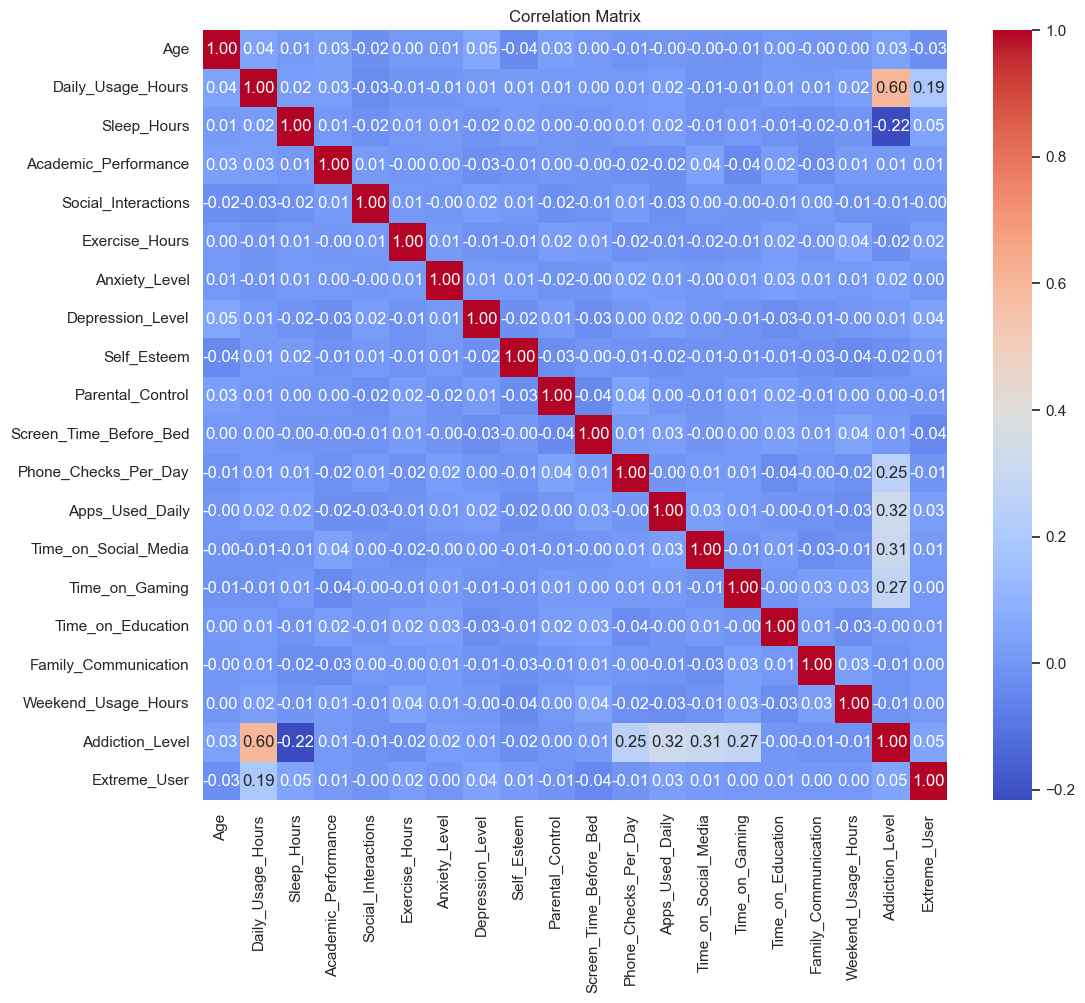

In [72]:
plt.figure(figsize=(12, 10))  # Set figure size before plotting
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt = ".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [84]:
data.columns


Index(['Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level', 'Extreme_User', 'Age_Group'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

# STEP!: CORRELATION BETWEEN NUMERICAL COLUMNS  AND ADDICTION LEVEL

In [85]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include="number").columns

# Exclude Addiction_Level from being compared with itself
numerical_cols = numerical_cols.drop("Addiction_Level", errors='ignore')

# Store results in a dictionary
correlations = {}

for col in numerical_cols:
    corr_value = data["Addiction_Level"].corr(data[col])
    correlations[col] = corr_value

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=["Correlation_with_Addiction_Level"])
correlation_df = correlation_df.sort_values(by="Correlation_with_Addiction_Level", ascending=False)

# Display the results
print(correlation_df)


                        Correlation_with_Addiction_Level
Daily_Usage_Hours                               0.596888
Apps_Used_Daily                                 0.320653
Time_on_Social_Media                            0.307981
Time_on_Gaming                                  0.274957
Phone_Checks_Per_Day                            0.250965
Age                                             0.031651
Anxiety_Level                                   0.017563
Screen_Time_Before_Bed                          0.011608
Academic_Performance                            0.010840
Depression_Level                                0.009999
Parental_Control                                0.001428
Time_on_Education                              -0.001655
Weekend_Usage_Hours                            -0.012399
Family_Communication                           -0.012671
Social_Interactions                            -0.014287
Exercise_Hours                                 -0.023132
Self_Esteem                    

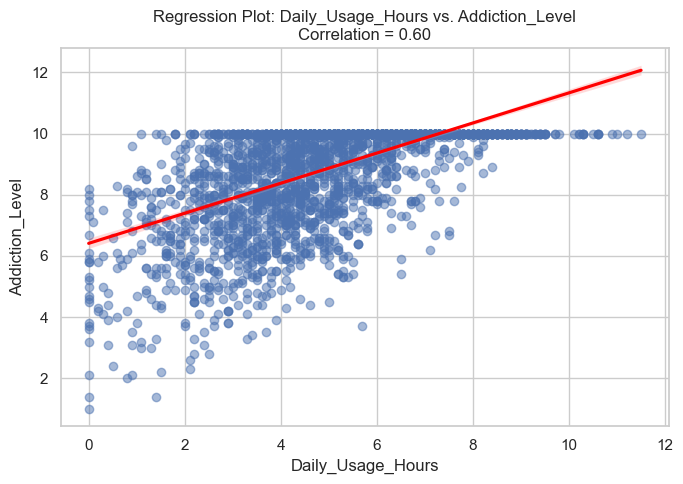

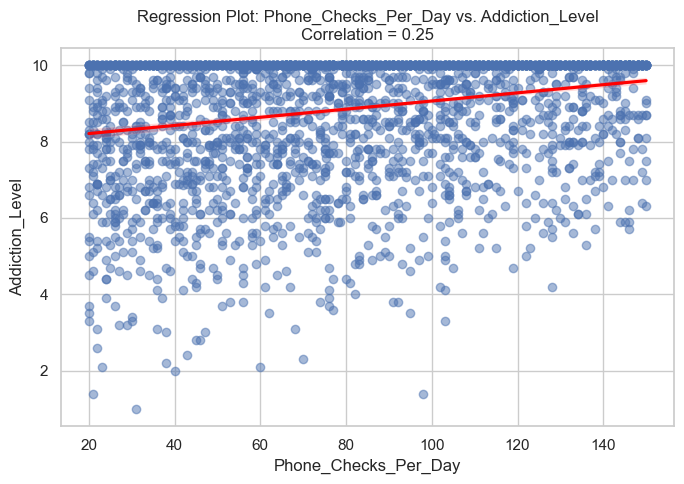

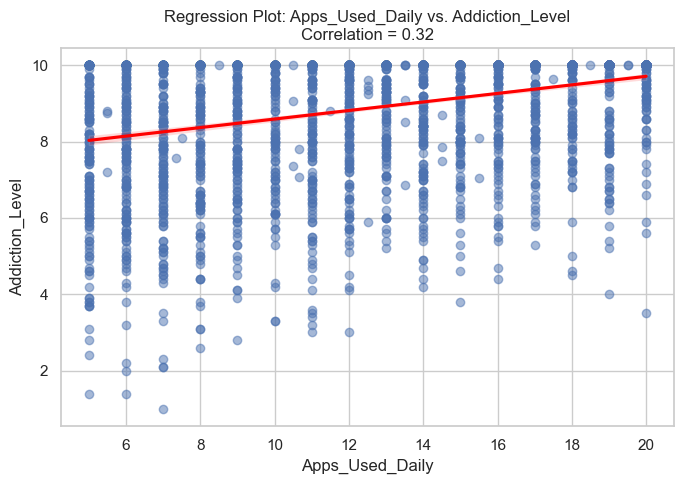

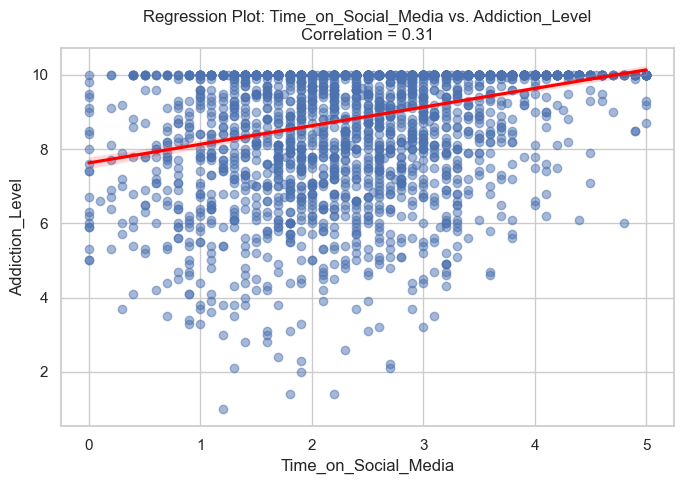

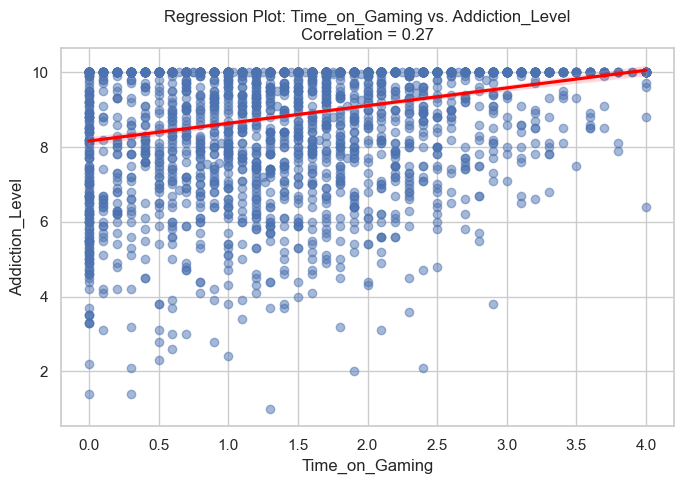

In [88]:


# Step 1: Get numeric columns and exclude the target
numerical_cols = data.select_dtypes(include="number").columns
numerical_cols = numerical_cols.drop("Addiction_Level", errors='ignore')

# Step 2: Compute correlations
correlations = {
    col: data["Addiction_Level"].corr(data[col])
    for col in numerical_cols
}

# Step 3: Filter for only positive correlations ≥ 0.2
positive_corrs = {
    col: corr for col, corr in correlations.items()
    if corr >= 0.2
}

# Step 4: Plot regression plots for the filtered columns
for col in positive_corrs:
    plt.figure(figsize=(7, 5))
    sns.regplot(
        x=col,
        y="Addiction_Level",
        data=data,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
    )
    plt.title(f"Regression Plot: {col} vs. Addiction_Level\nCorrelation = {positive_corrs[col]:.2f}")
    plt.xlabel(col)
    plt.ylabel("Addiction_Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [90]:
# WE want to check the correlation between addiction level and other numerical columns
# define the columns to check
cols_to_check = ["Academic_Performance", "Self_Esteem", "Depression_Level"]
correlations = {}

for col in cols_to_check:
    if col in data.columns:
        corr = data["Addiction_Level"].corr(data[col])
        correlations[col] = corr

# Print results
print("Correlation with Addiction_Level:")
for k, v in correlations.items():
    direction = "↑" if v > 0 else "↓"
    print(f"{k}: {v:.2f} {direction}")


Correlation with Addiction_Level:
Academic_Performance: 0.01 ↑
Self_Esteem: -0.02 ↓
Depression_Level: 0.01 ↑
